In [15]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pickle

fs = 128 
n_subjects = 5
mkpt1 = int(fs*10*60)
mkpt2 = int(fs*20*60)
channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
# available ['F7','F3','P7','O1','O2','P8','AF4']
useful_channels = ['F7', 'P7', 'P8', 'AF4'] # Muse = Training; AF7 = F7; TP9 = P7; TP10 = P8; AF8 = AF4;
use_channel_inds = []
for c in useful_channels:
    if c in channels:
        use_channel_inds.append(channels.index(c))
inp_dir = ''

In [16]:
subject_map = {}
for s in range(1, n_subjects+1):
    a =  int(7*(s-1)) + 3
    if s!=5:
        b = a + 5
    else:
        b = a + 4
    subject_map[s] = [i for i in range(a, b)]
print(subject_map)
for s in range(1, n_subjects+1):
    data = {}
    data['channels'] = ['AF7', 'TP9', 'TP10', 'AF8']
    data['fs'] = fs
    for i, t in enumerate(subject_map[s]):
        trial = {}
        trial_data = loadmat(inp_dir + f'eeg_record{t}.mat')
        eeg = trial_data['o']['data'][0][0][:, 3:17]
        eeg = eeg[:, use_channel_inds]
        trial['focussed'] = eeg[:mkpt1]
        trial['unfocussed'] = eeg[mkpt1:mkpt2]
        trial['drowsed'] = eeg[mkpt2:]
        data[f'trial_{i+1}'] = trial
    with open(f'subject_{s}.pkl', 'wb') as f: 
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

{1: [3, 4, 5, 6, 7], 2: [10, 11, 12, 13, 14], 3: [17, 18, 19, 20, 21], 4: [24, 25, 26, 27, 28], 5: [31, 32, 33, 34]}


In [17]:
with open('subject_1.pkl', 'rb') as f: 
    subject_1 = pickle.load(f)

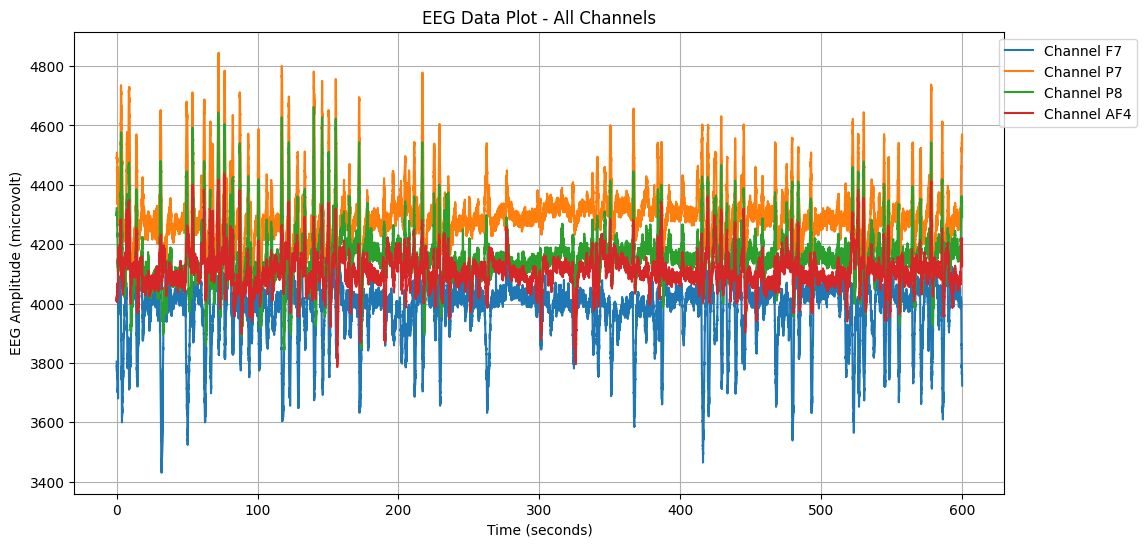

In [18]:
eeg_data = subject_1['trial_1']['focussed']
num_frames = eeg_data.shape[0]
num_channels = eeg_data.shape[1]
time_axis = np.arange(0, num_frames) / fs

# Channel labels ['F7', 'F3', 'P7', 'O1', 'O2', 'P8', 'AF4']

# Plot EEG data for all channels on the same plot
plt.figure(figsize=(12, 6))
for i in range(num_channels):
    plt.plot(time_axis, eeg_data[:, i], label=f'Channel {useful_channels[i]}')

# Create a legend for each channel
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.title('EEG Data Plot - All Channels')
plt.xlabel('Time (seconds)')
plt.ylabel('EEG Amplitude (microvolt)')
plt.grid(True)
plt.show()


In [20]:
subject_1

{'channels': ['AF7', 'TP9', 'TP10', 'AF8'],
 'fs': 128,
 'trial_1': {'focussed': array([[3804.1025641 , 4490.76923077, 4321.02564103, 4024.1025641 ],
         [3796.41025641, 4489.23076923, 4311.79487179, 4017.94871795],
         [3798.97435897, 4489.23076923, 4313.84615385, 4018.97435897],
         ...,
         [3751.79487179, 4540.51282051, 4321.02564103, 4151.28205128],
         [3738.46153846, 4525.64102564, 4304.1025641 , 4134.87179487],
         [3723.58974359, 4519.48717949, 4291.79487179, 4125.64102564]]),
  'unfocussed': array([[3714.87179487, 4509.23076923, 4281.53846154, 4123.58974359],
         [3706.15384615, 4491.79487179, 4267.69230769, 4117.43589744],
         [3698.97435897, 4484.1025641 , 4262.05128205, 4112.30769231],
         ...,
         [3990.25641026, 4286.15384615, 4168.71794872, 4082.05128205],
         [3980.51282051, 4282.05128205, 4166.66666667, 4082.05128205],
         [3973.33333333, 4282.05128205, 4165.12820513, 4086.15384615]]),
  'drowsed': array([[39